# Mathematical models in Jupyter

## Introduction

Jupyter is a fully-functional alternative to Mathematica or Maple notebooks for developing and analyzing mathematical models in biology (or any other discipine, for that matter). For this, you will need to use a [Computer Algebra System](https://en.wikipedia.org/wiki/Computer_algebra_system) (CAS). A CAS is software that emulates manual (pen-and-paper) manipulations of mathematical expressions. Yes, it can be done, and very effectively, for a vast array of mathematical problems! A CAS combined with a graphing/plotting package like matplotlib gives you a powerful tool for mathematical modelling using a Jupyter notebook.

We will use Python's [SymPy](http://sympy.org/en/index.html) package, which provides powerful CAS features for most common mathematical modelling problems. 

There is also [Sage](http://www.sagemath.org/), a more capable CAS. We will not use it here because is not a regular Python package, but rather, uses Python as its programming language. So unlike SymPy it cannot just be loaded in a Jupyter nb with a Python kernel. Instead, you will need to [install its Jupyter kernel](http://doc.sagemath.org/html/en/reference/repl/sage/repl/ipython_kernel/install.html). You can [install and try sage](http://www.sagemath.org/download.html) outside of Jupyter if you want.

So let's use SymPy in Jupyter.

If you used [Anaconda](http://continuum.io/downloads) to install Jupyter, it should already include SymPy, Matplotlib, IPython, NumPy, and other useful packages for scientific computing. If you don't have SymPy for some other reason, install it in Linux/mac using: 
```bash
$ sudo apt install python3-sympy
```
Otherwise, follow the instructions [here](http://docs.sympy.org/latest/install.html). 

We also need to rum some commands so that the plots appear correctly:

In [1]:
%matplotlib inline
import matplotlib.pyplot as p

And import scipy and sympy:

In [2]:
from sympy import *
import scipy as sc
init_printing() # for pretty-printing equations etc

## Some preliminaries

Before we get started with our mathematical modelling session in Jupyter, some SymPy preliminaries. 

### Symbolic variables

In CAS' like SymPy, we need to create symbolic variables for the mathematical variables we want to work with. A new symbolic variable can be created using `var`. Try this:

In [3]:
x = var('x')
type(x) # check it's class

sympy.core.symbol.Symbol

You can also define multiple symbolic variables at one go:

In [4]:
a, b, c = var("a, b, c")

For more info on symbolic variables, [have a look at this](http://docs.sympy.org/latest/gotchas.html#variables).

It is often important to add assumptions (constraints) to our symbolic vars:

In [5]:
x = var('x', real=True)

Now check:

In [6]:
x.is_imaginary

False

In [7]:
x = Symbol('x', positive=True)

Again, check:

In [13]:
x > 0

In [12]:
x < 0

### Symbolic equations

We can define the mathematical equations (functions) that we will be using/manipulating as follows:  

In [14]:
MyFun = (pi + x)**2; MyFun

In [ ]:
MyFun = N_0 + (N_max - N_0) * exp(-exp(r_max * exp(1) * (t_lag - t)/((N_max - N_0) * log(10)) + 1))

See the nice $\LaTeX$ - formatted output: this is where `init_printing()` comes handy. 

<div style="padding:6px;background-color:cornsilk;line-height:1.4;">
SymPy has predefined expressions for a number of mathematical constants, such as: `pi` ($\pi$), `e` (exponential), `oo` (infinity).
</div> 

You can also get your equation in latex syntax! Try:

In [11]:
latex(MyFun)

'\\left(x + \\pi\\right)^{2}'

That has extra escape slashes for Python to be able to parse it correctly. To display it in its actual form (that you can directly use in a $\LaTeX$ document), `print` it: 

In [12]:
print(latex(MyFun))

\left(x + \pi\right)^{2}


### Numerical evaluation

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [13]:
pi.evalf(n=100) # pi to a 100 places after decimal!

`N()` is shorthand alias for `evalf()`:

In [14]:
N(pi, 50)

So let's try evaluating our function:

In [15]:
N(MyFun, 5)

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [16]:
MyFun.subs(x, 1.5)

Now let's evaluate it:

In [17]:
MyFun.subs(x, 1.5)

The `subs` function can also be used to substitute mathematical variables or expressions. Let's substitute $x$ with $a+\pi$:

In [18]:
MyFun.subs(x, a+pi)

And assign it as a new symbolic equation for using later:

In [19]:
MyFun_new = MyFun.subs(x, a+pi); MyFun_new

We can also numerically evaluate the function over a range of values using NumPy arrays:

In [20]:
x_vec = sc.arange(0, 10, 0.1)

In [21]:
MyFun_vec = sc.array([N(MyFun.subs(x, xx)) for xx in x_vec]) #Note: using a list comprehension!

We can also evaluate the new function `MyFun_new` we created by substitution above:

In [22]:
MyFun_new_vec = sc.array([N((MyFun_new).subs(a, xx)) for xx in x_vec])

Now plot the two functions that you evaluated (try adding axes and a legend to these basic plots). 

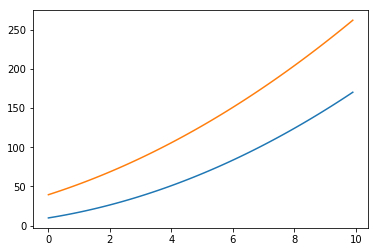

In [23]:
fig, ax = p.subplots()
ax.plot(x_vec, MyFun_vec)
ax.plot(x_vec, MyFun_new_vec)

However, numerical evaluation using `evalf()` can be very slow. There is a much more efficient way to do it by using [`lambdify()`](http://docs.sympy.org/latest/modules/utilities/lambdify.html) to "compile" a Sympy expression into a function that is much more efficient to evaluate numerically:

In [24]:
MyFun_lamb = lambdify([x], MyFun, 'numpy')

The first argument is a (python) list of variables that `MyFun_lamb` will be a function of. In this case its only $x$. Now we can directly pass a numpy array and MyFun is evaluated more efficiently:

In [25]:
MyFun_vec = MyFun_lamb(x_vec)

The speedup when using "lambdified" functions instead of direct numerical evaluation can be significant, often several orders of magnitude. Even in this simple example we get a significant speed up:

In [26]:
%%timeit #remember this?

MyFun_vec = sc.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

27.7 ms ± 7.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%timeit

MyFun_vec = MyFun_lamb(x_vec)

2.64 µs ± 684 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Fundamental mathematical operations 

Let's look at some fundamental methematical operations in SymPy that you will almost certainly use at some point in biological models. You can find a full list and addtional tutorials and examples at [SymPy documentation](http://docs.sympy.org/latest/index.html).  

### Expand and factor

In [28]:
expand(MyFun)

The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions to want to perform; use `help(expand)` (or the [SymPy documentation](http://docs.sympy.org/latest/index.html)) for more info.

You can also print the result of an manipulation in its raw python form:  

In [29]:
print(expand(MyFun))

x**2 + 2*pi*x + pi**2


You can also factor using, well, `factor()`:

In [30]:
factor(x**2 + 2*pi*x + pi**2)

### Apart and together

To manipulate symbolic expressions of fractions, you can use the `apart` and `together` functions:

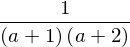

In [31]:
f1 = 1/((a+1)*(a+2)); f1

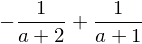

In [32]:
apart(f1)

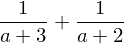

In [33]:
f2 = 1/(a+2) + 1/(a+3); f2

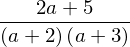

In [34]:
together(f2)

### Simplification

The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. More specific alternatives to the `simplify` functions also exist: `trigsimp`, `powsimp`, `logcombine`, etc. Applying `simplify` to the above example will give the same result as `together`: 

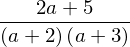

In [35]:
simplify(f2)

Note that simplify usually combines fractions but does not factor. 

In addition to algebraic manipulations, the other main use of CAS is to do calculus, like derivatives and integrals of algebraic expressions.

### Differentiation

Differentiation is usually simple. Use the `diff` function. The first argument is the expression to take the derivative of, and the second argument is the symbol by which to take the derivative:

In [36]:
diff(MyFun_new, a)

For higher order derivatives we can do:

In [37]:
diff(MyFun_new, a, a)

In [38]:
diff(MyFun_new**2, a, 2) # same as above

You can directly apply another manipulation to the result of a previous operation:

In [39]:
expand(diff(MyFun_new**2, a, 2))

Calculate the derivative of a multivariate expression:

In [40]:
x, y, z = var("x,y,z")

In [41]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [42]:
diff(f, x, 1, y, 2)

### Integration

Integration is done in a similar fashion:

In [43]:
MyFun

In [44]:
integrate(MyFun, x)

By providing limits for the integration variable we can evaluate definite integrals:

In [45]:
integrate(MyFun, (x, -1, 1))

and also improper integrals

In [46]:
integrate(exp(-x**2), (x, -oo, oo))

Remember, `oo` is the SymPy notation for inifinity.

### Sums and products

You can evaluate sums and products using `Sum`. Note that this function is named `Sum` and not `sum` to avoid namespace conflict.

In [47]:
n = var("n")

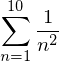

In [48]:
Sum(1/n**2, (n, 1, 10))

In [49]:
Sum(1/n**2, (n,1, 10)).evalf()

In [50]:
Sum(1/n**2, (n, 1, oo)).evalf()

Products work much the same way:

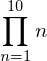

In [51]:
Product(n, (n, 1, 10)) # 10!

### Limits

Limits can be evaluated using the `limit` function. For example, 

In [52]:
limit(sin(x)/x, x, 0)

We can use 'limit' to check the result of derivation using the `diff` function:

In [53]:
f

In [54]:
diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [55]:
h = var("h")

In [56]:
limit((f.subs(x, x+h) - f)/h, h, 0)

OK!

We can change the direction from which we approach the limiting point using the `dir` keywork argument:

In [57]:
limit(1/x, x, 0, dir="+")

In [58]:
limit(1/x, x, 0, dir="-")

### Series

Series expansion is also one of the most useful features of a CAS. In SymPy we can perform a series expansion of an expression using the `series` function:

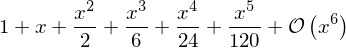

In [59]:
series(exp(x), x) # this is a classic!

By default it expands the expression around $x=0$, but we can expand around any value of $x$ by explicitly include a value in the function call:

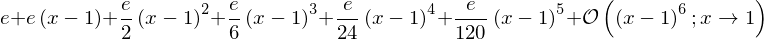

In [60]:
series(exp(x), x, 1)

Or try:

In [61]:
series(log(x), x, 0) # will not work why?

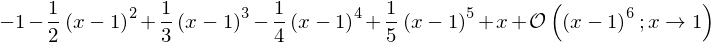

In [62]:
series(log(x), x,1) # this will work, however 

And we can explicitly define to which order the series expansion should be carried out:

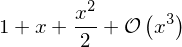

In [63]:
series(exp(x), x, 0, 3)

Another way to do the same:

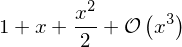

In [64]:
exp(x).series(x,0,3)

The series expansion includes the order of the approximation, which is very useful for keeping track of the order of validity when we do calculations with series expansions of different orders:

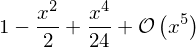

In [65]:
s1 = cos(x).series(x, 0, 5); s1

In [66]:
s2 = sin(x).series(x, 0, 2); s2

In [67]:
expand(s1 * s2)

If we want to get rid of the order information we can use the `removeO` method:

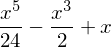

In [68]:
expand(s1.removeO() * s2.removeO())

### Matrix algebra

Matrices are defined using the `Matrix` class:

In [69]:
m11, m12, m21, m22 = var("m11, m12, m21, m22")
b1, b2 = var("b1, b2")

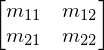

In [70]:
A = Matrix([[m11, m12],[m21, m22]]) # Again, note: capital M for to avoid namespace conflict 
A

In [71]:
b = Matrix([[b1], [b2]]); b

With `Matrix` class instances we can do the usual matrix algebra operations:

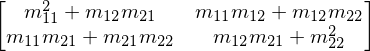

In [72]:
A**2

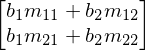

In [73]:
A * b

And calculate determinants and inverses, and the like:

In [74]:
A.det()

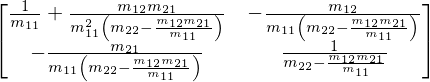

In [75]:
A.inv()

### Solving equations

For solving equations and systems of equations we can use the `solve` function:

In [76]:
solve(x**2 - 1, x)

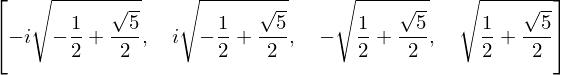

In [77]:
solve(x**4 - x**2 - 1, x)

System of equations:

In [78]:
solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

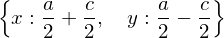

In [79]:
solve([x + y - a, x - y - c], [x,y])

You can also solve a single, or a system of ordinary differential equations (ODEs) using 
[dsolve](http://docs.sympy.org/latest/modules/solvers/ode.html). WE will use this in a couple of the biological examples below.  

## Some biological examples

Here are some examples of development and analysis of some fundamental mathematical models in biology.

### One population: Exponential growth 

Let's look at how populations grow when there are no environmental constraints. The differential equation model is:

\begin{equation}\label{eq:exp_growth}
	\frac{\text{d}N}{\text{d}t} = r_m N
\end{equation}

where $r_m$ is the intrinsic, constant rate of population gowth (units of 1/time), and $N$ is population size (or biomass abundance). I use the subscript $m$ in $r_m$ to denote both [Malthusian](https://en.wikipedia.org/wiki/Malthusianism) and maximal population growth rate because, in theory, without any constraints, this growth rate is expected to at its theoretical/biological maximum.

Let's solve equation \ref{eq:exp_growth} so that we can calculate population size $N_t$ at any given time $t$ given a starting population size  $N_0$ at time 0.

First assign the symbolic variables:

In [15]:
r_max, N_0, K, t_lag, t  = var("r_max N_0 K t_lag t",real = True) # the real bit is not really necessary here

In [ ]:
N_0 + (K - N_0) * exp(-exp(r_max * exp(1) * (t_lag - t)/((K - N_0) * log(10)) + 1))

In [80]:
r_m, N, t = var("r_m N t",real = True) # the real bit is not really necessary here

Now tell SymPy that $N$ is a function:

In [81]:
N = Function('N')

Define $N$ is a derivative of $t$

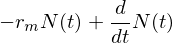

In [82]:
dN_dt = Derivative(N(t), t) - r_m*N(t); dN_dt

Note that we have simply re-written the condition that LHS = RHS in eqn \ref{eq:exp_growth}. Now that we have the differential equation set up, we can solve it using `dsolve`. Since this is a simple ODE, Sympy can do it on its own with no hints or guesses (unlike more complex ODEs; [see the documentation](http://docs.sympy.org/latest/modules/solvers/ode.html)):

In [83]:
MyEq_sol = dsolve(dN_dt); MyEq_sol

If you remember your high-school calculus, you might recall that $C_1$ here is an arbitrary constant. We now need to re-express it in terms of the initial conditions. We can do so by setting $t = 0$, and then setting that equal to $N(0)$ at time 0: 

$$C_1 = N_0$$

That is, 

\begin{equation}\label{eq:exp_growth_sol}
N{\left (t \right )} = N_0 e^{r_m t}
\end{equation}

We could use Sympy for this last step as well (using `subs()` like you learned above), but that would be just plain silly -- like using a sledge-hammer to drive in a nail! 

We can now have a go at plotting the model (eqn. \ref{eq:exp_growth}), and also the solution eqn. \ref{eq:exp_growth_sol}. First, let's get an approximate solution by using numerical integration (which you learnt in the Advanced Python chapter):

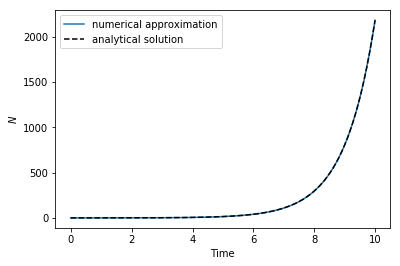

In [84]:
from scipy  import integrate

# parameters
r_m = 1.

# initial conditions
N_0 = 0.1

# The time vector
t_vec = sc.arange(0, 10., 0.01)

def exp_pop(N, t, r_m):
    """The right-hand side of the exponential growth ODE"""
    return r_m*N

N_vec = integrate.odeint(exp_pop, N_0, t_vec, args=(r_m,)) # the comma is needed!

# plot the numerical solution
p.plot(t_vec, N_vec)
p.xlabel('Time') ; p.ylabel('$N$') 

# plot analytical solution
p.plot(t_vec, N_0 * sc.exp(r_m * t_vec),'k--')
p.legend(['numerical approximation', 'analytical solution'], loc='best') # draw legend

These look practically identical. But they are not:

In [85]:
N_vec - N_0 * sc.exp(r_m * t_vec)

array([[  0.00000000e+00,  -1.00501671e-03,  -2.02013400e-03, ...,
         -2.13744854e+03,  -2.15893125e+03,  -2.18062988e+03],
       [  1.00502283e-03,   6.11819401e-09,  -1.01511118e-03, ...,
         -2.13744753e+03,  -2.15893025e+03,  -2.18062887e+03],
       [  2.02014197e-03,   1.01512526e-03,   7.96376975e-09, ...,
         -2.13744651e+03,  -2.15892923e+03,  -2.18062786e+03],
       ..., 
       [  2.13744963e+03,   2.13744863e+03,   2.13744761e+03, ...,
          1.09563845e-03,  -2.14816243e+01,  -4.31802491e+01],
       [  2.15893236e+03,   2.15893136e+03,   2.15893034e+03, ...,
          2.14838268e+01,   1.10688877e-03,  -2.16975180e+01],
       [  2.18063100e+03,   2.18062999e+03,   2.18062898e+03, ...,
          4.31824631e+01,   2.16997432e+01,   1.11834951e-03]])

### One population: Logistic Population growth

Populations eventually run into contraints, even if they can grow exponentially at the start (eqn \ref{eq:exp_growth}). The classical model for logistic growth in population density ($N$) captures this dynamic:

\begin{equation}\label{eq:logist_growth}
	\frac{\text{d}N}{\text{d}t} = r_m N \left(1-\frac{N}{K}\right)
\end{equation}

where $K$ is the carrying capacity of the environment, while $r_m$ is the same parameter same as above. Let's solve this one as well. 

As in the case of the exponential growth above, let's find the solution to this equation for any arbitrary time point $t$.  

Again, first we define the vars and the function:

In [86]:
r_m, K, N, t = var("r_m K N t",real = True) # the real bit is not really necessary here

N = Function('N')

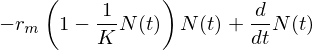

In [87]:
dN_dt = Derivative(N(t), t) - r_m * N(t) * (1 - N(t) / K); dN_dt

Again, as in the exponential growth example, we have simply re-written the condition that LHS = RHS in eqn \ref{eq:logist_growth}. Now we can solve the ODE:

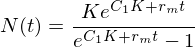

In [88]:
MyEq_sol = dsolve(dN_dt); MyEq_sol

This is a bit more complicated than the solution for exponential growth above. But we can solve it the same way. First substitute $t = 0$, and then solve the resulting equation for the initital condition of $N_0$, which then gives This the time-dependent solution:
\begin{equation}
    N_t = \frac{N_0 K\mathrm{e}^{r_m t}}{K + N_0(\mathrm{e}^{r_m t}-1)}
\end{equation}

You can do the last steps to obtain this solution using Sympy as well (I leave it to you to try it).

No let's again compare the analytical solution against the numerical one:

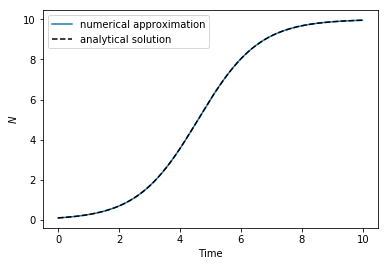

In [89]:
from scipy  import integrate

# parameters
r_m = 1.
K = 10.
# initial condition
N_0 = 0.1

#The time vector 
t_vec = sc.arange(0, 10., 0.01)

def log_pop(N, t, r_m, K):
    """The right-hand side of the logistic ODE"""
    return r_m*N*(1-N/K)

N_vec = integrate.odeint(log_pop, N_0, t_vec, args=(r_m, K));

p.plot(t_vec, N_vec) # plot the solution
p.xlabel('Time') ; p.ylabel('$N$') 

# plot analytical solution
p.plot(t_vec, K * N_0 * sc.exp(r_m * t_vec)/(K + N_0 * (sc.exp(r_m * t_vec) - 1.)),'k--')
p.legend(['numerical approximation', 'analytical solution'], loc='best') # draw legend

### Two interacting populations: The Lotka-Volterra predator-prey model

Now for the classical Lotka-Volterra model that you encountered in the advanced Python week (without logistic growth for the consumer, $C$).

\begin{align}
\frac{dN}{dt} &= r_m N \left(1-\frac{N}{K}\right) - a N C\\
\frac{dC}{dt} &= e a N C - z C
\end{align}
 
here $r_m$ and $K$ is the Resource's growth rate and carrying capacity respectively as in the Logistic equation, $a$ is the consumer's search rate for the resource, $e$ is consumer's biomass conversion efficiency, and $z$ is it's mortality rate. 

To solve this system of ODEs, we will take a different approach -- We will solve for the equilibrum (steady state for the two species' populations). Again, we start by define the vars:

In [90]:
r_m, a, e, z, K, N, C, t = var("r_m, a, e, z, K, N, C, t",real = True)

Now define the sysyem of ODEs for Sympy:

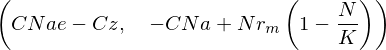

In [91]:
dN_dt = r_m * N *(1-N/K) - a * N * C
dC_dt = e * a * N * C - z * C

dC_dt, dN_dt

Now define the equilibrium state:

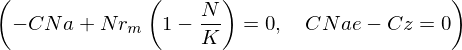

In [92]:
N_eqlb = Eq(dN_dt, 0)
C_eqlb = Eq(dC_dt, 0)
N_eqlb, C_eqlb

Solve it:

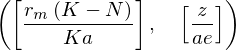

In [93]:
N_eqlb_sol = solve(N_eqlb, C)
C_eqlb_sol = solve(C_eqlb, N)

N_eqlb_sol, C_eqlb_sol

So there is one equilibrium  solution where both species maintain their non-zero populations. That was easy! Now you don't need to guess what parameter values will give you coexistence (both populations remain > 0). Just substitute parameter combinations that satisfy the conditions that

$$ \frac{r_{m} \left(K - N\right)}{K a} > 0, \textrm{ and } \frac{z}{a e} > 0$$

As an exercise try plotting this exact solution for the steady state along with the one you would obtain (asymptotically) using numerical integration of the system of ODEs. Below is code that does the numerical integration (essentially, same as the `LV.py` script).  

In [102]:
from scipy import integrate

t_vec = sc.arange(0, 100., 0.01)

# parameters
r_m = 1.
a = 1
e = 0.5
z = .5
K =10

# initial condition: this is an array now!
N0C0 = sc.array([1., 1.])

# the function still receives only `x`, but it will be an array, not a number
def LV(NC, t, r_m, K, a, e, z):
    # Unlike the esponental and logistic growth model, we now need to convert 
    # the output to a numpy array as it has two populations.
    return sc.array([ r_m * NC[0]*(1-NC[0]/K) - a * NC[0] * NC[1],
                   e * a * NC[0] * NC[1] - z * NC[1] ])

NC_vec = integrate.odeint(LV, N0C0, t_vec, (r_m, K, a, e, z))

Check NC_vec's dimensions:

In [104]:
print(NC_vec.shape)

(10000, 2)


Now let's plot the solution. But first, just for fun, let's change the plot style:

In [105]:
print(p.style.available)

['bmh', 'seaborn-darkgrid', 'fast', 'seaborn-dark', 'seaborn-notebook', 'classic', 'seaborn', 'ggplot', 'seaborn-white', 'seaborn-pastel', 'seaborn-deep', 'seaborn-dark-palette', 'dark_background', 'seaborn-paper', 'grayscale', 'seaborn-ticks', '_classic_test', 'seaborn-whitegrid', 'Solarize_Light2', 'seaborn-talk', 'fivethirtyeight', 'seaborn-poster', 'seaborn-muted', 'seaborn-colorblind', 'seaborn-bright']


In [106]:
p.style.use('seaborn-darkgrid')

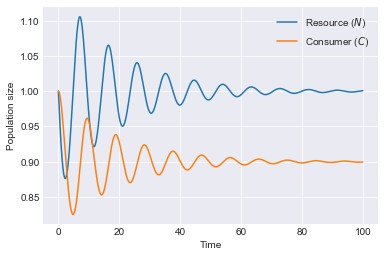

In [107]:
p.plot(t_vec, NC_vec)
p.xlabel('Time'); p.ylabel('Population size') # and of y-axis
p.legend(['Resource ($N$)', 'Consumer ($C$)'], loc='best')

An useful thing to do here is take a look at the *phase space*, that is, plot only the dependent variables, without respect to time:

Initial condition: [ 1.  1.]


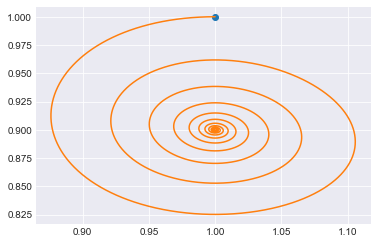

In [108]:
p.plot(NC_vec[0,0], NC_vec[0,1], 'o')
print('Initial condition:', NC_vec[0])

p.plot(NC_vec[:,0], NC_vec[:,1])

#Another solution with a different initial condition:
#NC_vec2 = odeint(LV, [2., 4.], t_vec, (r_m, K, a, e, z))
#p.plot(NC_vec2[:,0], NC_vec2[:,1])
#p.plot(NC_vec2[0,0], NC_vec2[0,1], 'o')
#p.xlabel('Resource Population size'); p.ylabel('Consumer Population size') # and of y-axis

## Readings and Resources

* [The SymPy documentation](http://sympy.org/en/index.html)
* [SymPy online](http://live.sympy.org)